In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, permutations, product
from package.saveload import *

# Nonreflected 24

That complex contains 24 simplices but there are not each face parallely moved to zero gives a reflection.

But there is central symmetry.

That means, opposite faces can not be same by parallel moove

In [2]:
vertices = np.array(list(permutations([0, 1, 2], 3)))
vertices = np.concatenate([vertices*np.array(i) for i in product([1, -1], repeat=3)])
vertices = 0.5*np.unique(vertices, axis=0)
vertices

array([[-1. , -0.5,  0. ],
       [-1. ,  0. , -0.5],
       [-1. ,  0. ,  0.5],
       [-1. ,  0.5,  0. ],
       [-0.5, -1. ,  0. ],
       [-0.5,  0. , -1. ],
       [-0.5,  0. ,  1. ],
       [-0.5,  1. ,  0. ],
       [ 0. , -1. , -0.5],
       [ 0. , -1. ,  0.5],
       [ 0. , -0.5, -1. ],
       [ 0. , -0.5,  1. ],
       [ 0. ,  0.5, -1. ],
       [ 0. ,  0.5,  1. ],
       [ 0. ,  1. , -0.5],
       [ 0. ,  1. ,  0.5],
       [ 0.5, -1. ,  0. ],
       [ 0.5,  0. , -1. ],
       [ 0.5,  0. ,  1. ],
       [ 0.5,  1. ,  0. ],
       [ 1. , -0.5,  0. ],
       [ 1. ,  0. , -0.5],
       [ 1. ,  0. ,  0.5],
       [ 1. ,  0.5,  0. ]])

In [3]:
dists = np.linalg.norm(np.array([vertices for i in vertices]) - np.array([vertices for i in vertices]).transpose([1, 0, 2]), axis=-1)
edges = np.array(np.where(dists == 0.5* 2**0.5)).transpose()

len(vertices), len(edges)

(24, 72)

/tmp/ipykernel_48932/2203189743.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


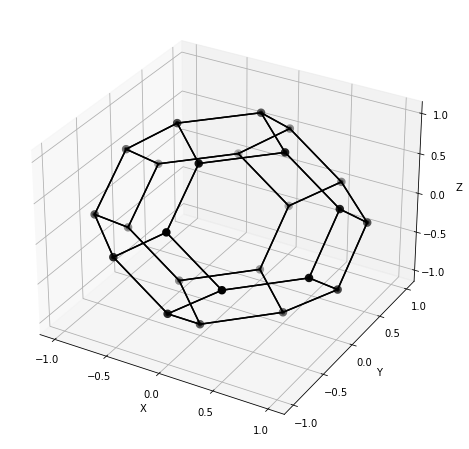

In [4]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', linewidth=4)
for edge in edges:
    p0 = vertices[edge[0]]
    p1 = vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='black')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [5]:
outer_vertices = np.array([[ 0.0, -0.5, -1.0], 
                           [ 0.0,  0.5, -1.0],
                           [ 0.0, -0.5,  1.0], 
                           [ 0.0,  0.5,  1.0],
                           [ 0.5, -1.0,  0.0],
                           [-0.5, -1.0,  0.0],
                           [ 0.5,  1.0,  0.0],
                           [-0.5,  1.0,  0.0], 
                           [-1.0,  0.0,  0.5], 
                           [-1.0,  0.0, -0.5], 
                           [ 1.0,  0.0,  0.5], 
                           [ 1.0,  0.0, -0.5]])
inner_vertices = []
for v in vertices:
    if not(tuple(v) in [tuple(i) for i in outer_vertices]):
        inner_vertices.append(v)
inner_vertices = np.array(inner_vertices)
    
len(vertices), len(inner_vertices), len(outer_vertices)

(24, 12, 12)

/tmp/ipykernel_48932/1364822209.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


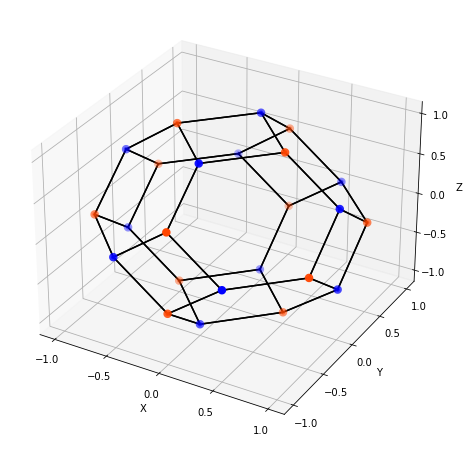

In [6]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(outer_vertices[:, 0], outer_vertices[:, 1], outer_vertices[:, 2], color='blue', linewidth=4)
ax.scatter(inner_vertices[:, 0], inner_vertices[:, 1], inner_vertices[:, 2], color='orangered', linewidth=4)
for edge in edges:
    p0 = vertices[edge[0]]
    p1 = vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='black')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [7]:
dist_out = np.min(np.linalg.norm(inner_vertices - outer_vertices[0], axis=-1))

outer_polygons = []
for vertex in outer_vertices:
    polygon = inner_vertices[np.linalg.norm(inner_vertices - vertex, axis=-1) == dist_out]
    polygon = np.concatenate([[vertex], polygon])
    outer_polygons.append(polygon)
outer_polygons = np.array(outer_polygons)
outer_polygons.shape

(12, 4, 3)

In [8]:
dists_inner_matrix = np.linalg.norm(np.array([inner_vertices for i in inner_vertices]) - np.array([inner_vertices for i in inner_vertices]).transpose([1, 0, 2]), axis=-1)
dists_inner = np.unique(dists_inner_matrix)
inner_edges = np.array(np.where(np.logical_or(dists_inner_matrix == dists_inner[1], dists_inner_matrix == dists_inner[2]))).transpose()

/tmp/ipykernel_48932/1183917936.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


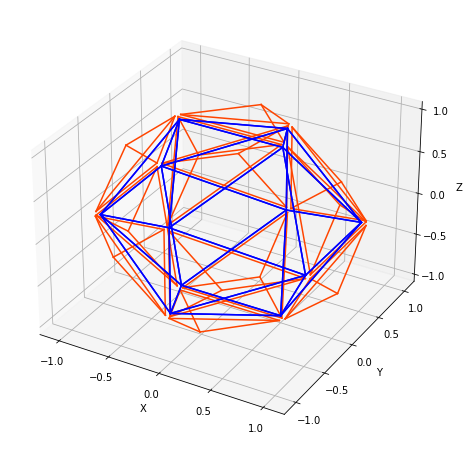

In [9]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

for polygon in outer_polygons:
    radius = polygon[0] / np.linalg.norm(polygon[0])
    that_polygon = polygon + 0.05*radius
    for p0, p1 in combinations(that_polygon, 2):
        xs = [p0[0], p1[0]]
        ys = [p0[1], p1[1]]
        zs = [p0[2], p1[2]]
        ax.plot(xs, ys, zs, color='orangered')
    
for edge in inner_edges:
    p0 = inner_vertices[edge[0]]
    p1 = inner_vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [10]:
inner_layer_0 = np.array([[0.5, 0.0, -1.0]])
inner_layer_1 = inner_vertices[np.argsort(np.linalg.norm(inner_vertices - inner_layer_0[0], axis=1))[1:6]]
inner_layer_2 = -inner_layer_1
inner_layer_3 = -inner_layer_0
inner_layers = [inner_layer_0, inner_layer_1, inner_layer_2, inner_layer_3]
inner_layers_colors = ['red', 'limegreen', 'deepskyblue', 'blue']

/tmp/ipykernel_48932/2650330943.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


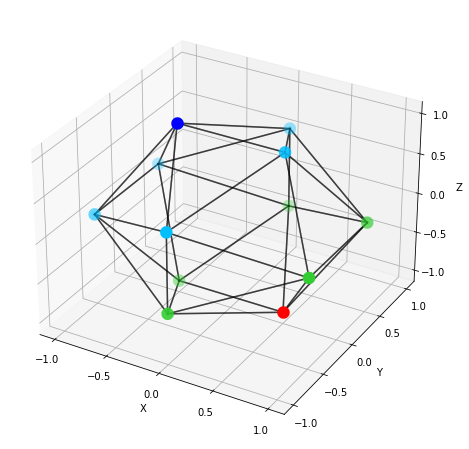

In [11]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
 
for edge in inner_edges:
    p0 = inner_vertices[edge[0]]
    p1 = inner_vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='black', alpha=0.5)

for i in range(4):
    ax.scatter(inner_layers[i][:, 0], inner_layers[i][:, 1], inner_layers[i][:, 2], color=inner_layers_colors[i], linewidth=8)
    
    
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [12]:
inner_polygons_01 = np.array([[inner_layer_0[0], inner_layer_1[0], inner_layer_1[3], inner_layer_1[4]], 
                              [inner_layer_0[0], inner_layer_1[0], inner_layer_1[1], inner_layer_1[3]], 
                              [inner_layer_0[0], inner_layer_1[0], inner_layer_1[2], inner_layer_1[4]]])
inner_polygons_23 = np.array([[inner_layer_3[0], inner_layer_2[0], inner_layer_2[3], inner_layer_2[4]], 
                              [inner_layer_3[0], inner_layer_2[0], inner_layer_2[1], inner_layer_2[3]], 
                              [inner_layer_3[0], inner_layer_2[0], inner_layer_2[2], inner_layer_2[4]]])
assert(inner_polygons_01 == -inner_polygons_23).all()

inner_polygons_12a = np.array([[inner_layer_1[0], inner_layer_2[0], inner_layer_2[3], inner_layer_2[4]], 
                               [inner_layer_1[0], inner_layer_2[0], inner_layer_2[1], inner_layer_2[3]], 
                               [inner_layer_1[0], inner_layer_2[0], inner_layer_2[2], inner_layer_2[4]]])
inner_polygons_12b = np.array([[inner_layer_2[0], inner_layer_1[0], inner_layer_1[3], inner_layer_1[4]], 
                               [inner_layer_2[0], inner_layer_1[0], inner_layer_1[1], inner_layer_1[3]], 
                               [inner_layer_2[0], inner_layer_1[0], inner_layer_1[2], inner_layer_1[4]]])
assert (inner_polygons_12a == -inner_polygons_12b).all()

inner_polygons = np.concatenate([inner_polygons_01, inner_polygons_12a, inner_polygons_12b, inner_polygons_23])
inner_polygons.shape

(12, 4, 3)

In [13]:
polygons = np.concatenate([inner_polygons, outer_polygons])
polygons.shape

(24, 4, 3)

In [14]:
filename = "package/simplicial-representations/TruncatedOctahedron-24nr.csv"
save(polygons, filename)
assert(load(filename) == polygons).all()

# 72

That complex contains 72 simplices.

There are 15 additional point are given to truncated octahedron vertices: 1 in center and 14 in center of every face.

In [15]:
vectors = np.array(list(permutations([0, 1, 2], 3)))
vectors = np.concatenate([vectors*np.array(i) for i in product([1, -1], repeat=3)])
vectors = 0.5*np.unique(vectors, axis=0)
vectors

array([[-1. , -0.5,  0. ],
       [-1. ,  0. , -0.5],
       [-1. ,  0. ,  0.5],
       [-1. ,  0.5,  0. ],
       [-0.5, -1. ,  0. ],
       [-0.5,  0. , -1. ],
       [-0.5,  0. ,  1. ],
       [-0.5,  1. ,  0. ],
       [ 0. , -1. , -0.5],
       [ 0. , -1. ,  0.5],
       [ 0. , -0.5, -1. ],
       [ 0. , -0.5,  1. ],
       [ 0. ,  0.5, -1. ],
       [ 0. ,  0.5,  1. ],
       [ 0. ,  1. , -0.5],
       [ 0. ,  1. ,  0.5],
       [ 0.5, -1. ,  0. ],
       [ 0.5,  0. , -1. ],
       [ 0.5,  0. ,  1. ],
       [ 0.5,  1. ,  0. ],
       [ 1. , -0.5,  0. ],
       [ 1. ,  0. , -0.5],
       [ 1. ,  0. ,  0.5],
       [ 1. ,  0.5,  0. ]])

In [16]:
faces4 = []
for i in range(3):
    faces4.append(np.arange(len(vectors))[vectors[:, i] == -1])
    faces4.append(np.arange(len(vectors))[vectors[:, i] == 1]) 
faces4 = np.array(faces4)
faces4 = faces4[:, [0, 1, 3, 2]]
faces4

array([[ 0,  1,  3,  2],
       [20, 21, 23, 22],
       [ 4,  8, 16,  9],
       [ 7, 14, 19, 15],
       [ 5, 10, 17, 12],
       [ 6, 11, 18, 13]])

In [17]:
for face in faces4:
    for i in range(4):
        assert np.linalg.norm(vectors[face[i]] - vectors[face[(i+1)%4]]) == 0.5*2**0.5

In [18]:
faces6 = []
for i in np.array(list(product([-0.5, 0.5], repeat=3))):
    faces6.append(np.arange(len(vectors))[((vectors - i)*i).sum(axis=1) == 0])
faces6 = np.array(faces6)
faces6 = faces6[:, [0, 1, 3, 5, 4, 2]]
faces6

array([[ 0,  1,  5, 10,  8,  4],
       [ 0,  2,  6, 11,  9,  4],
       [ 1,  3,  7, 14, 12,  5],
       [ 2,  3,  7, 15, 13,  6],
       [ 8, 10, 17, 21, 20, 16],
       [ 9, 11, 18, 22, 20, 16],
       [12, 14, 19, 23, 21, 17],
       [13, 15, 19, 23, 22, 18]])

In [19]:
for face in faces6:
    for i in range(6):
        assert np.linalg.norm(vectors[face[i]] - vectors[face[(i+1)%6]]) == 0.5*2**0.5

In [20]:
polygons = []
center = np.zeros(3)
for face in faces4:
    face_vertices = vectors[face]
    face_center = face_vertices.mean(axis=0)
    for i in range(4):
        polygons.append(np.array([center, face_center, face_vertices[i], face_vertices[(i+1)%4]]))
for face in faces6:
    face_vertices = vectors[face]
    face_center = face_vertices.mean(axis=0)
    for i in range(6):
        polygons.append(np.array([center, face_center, face_vertices[i], face_vertices[(i+1)%6]]))
    
polygons = np.array(polygons)
polygons.shape

(72, 4, 3)

In [21]:
filename = "package/simplicial-representations/TruncatedOctahedron-72.csv"
save(polygons, filename)
assert(load(filename) == polygons).all()

# 44

That complex contains 44 simplex.

That is one additional point: in the center.

In [22]:
vertices = np.array(list(permutations([0, 1, 2], 3)))
vertices = np.concatenate([vertices*np.array(i) for i in product([1, -1], repeat=3)])
vertices = 0.5*np.unique(vertices, axis=0)
vertices

array([[-1. , -0.5,  0. ],
       [-1. ,  0. , -0.5],
       [-1. ,  0. ,  0.5],
       [-1. ,  0.5,  0. ],
       [-0.5, -1. ,  0. ],
       [-0.5,  0. , -1. ],
       [-0.5,  0. ,  1. ],
       [-0.5,  1. ,  0. ],
       [ 0. , -1. , -0.5],
       [ 0. , -1. ,  0.5],
       [ 0. , -0.5, -1. ],
       [ 0. , -0.5,  1. ],
       [ 0. ,  0.5, -1. ],
       [ 0. ,  0.5,  1. ],
       [ 0. ,  1. , -0.5],
       [ 0. ,  1. ,  0.5],
       [ 0.5, -1. ,  0. ],
       [ 0.5,  0. , -1. ],
       [ 0.5,  0. ,  1. ],
       [ 0.5,  1. ,  0. ],
       [ 1. , -0.5,  0. ],
       [ 1. ,  0. , -0.5],
       [ 1. ,  0. ,  0.5],
       [ 1. ,  0.5,  0. ]])

In [23]:
dists = np.linalg.norm(np.array([vertices for i in vertices]) - np.array([vertices for i in vertices]).transpose([1, 0, 2]), axis=-1)
edges = np.array(np.where(dists == 0.5* 2**0.5)).transpose()

len(vertices), len(edges)

(24, 72)

/tmp/ipykernel_48932/2203189743.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


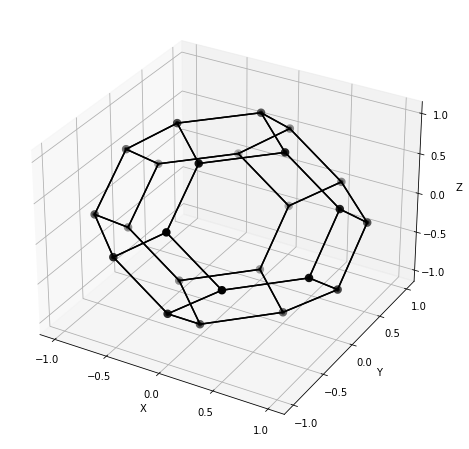

In [24]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', linewidth=4)
for edge in edges:
    p0 = vertices[edge[0]]
    p1 = vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='black')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [25]:
triangles_hexogons = np.array([([ 0.0, -0.5, -1.0], [ 0.5, -1.0,  0.0], [ 1.0,  0.0, -0.5]), 
                               ([-1.0,  0.5,  0.0], [-0.5,  0.0,  1.0], [ 0.0,  1.0,  0.5]), 
                               ([ 0.5,  0.0, -1.0], [ 1.0,  0.5,  0.0], [ 0.0,  1.0, -0.5]), 
                               ([-0.5, -1.0,  0.0], [ 0.0, -0.5,  1.0], [-1.0,  0.0,  0.5]),
                               ([ 0.5,  1.0,  0.0], [ 1.0,  0.0,  0.5], [ 0.0,  0.5,  1.0]),
                               ([-0.5,  0.0, -1.0], [ 0.0, -1.0, -0.5], [-1.0, -0.5,  0.0]),
                               ([ 0.0, -1.0,  0.5], [ 1.0, -0.5,  0.0], [ 0.5,  0.0,  1.0]), 
                               ([-1.0,  0.0, -0.5], [ 0.0,  0.5, -1.0], [-0.5,  1.0,  0.0])
                              ])


edges_triangulation = []
for triangle in triangles_hexogons:
    edges_triangulation.append([triangle[0], triangle[1]])
    edges_triangulation.append([triangle[0], triangle[2]])
    edges_triangulation.append([triangle[1], triangle[2]])

In [26]:
square_diagonals = np.array([([ 0.0,  0.5,  1.0], [ 0.0, -0.5,  1.0]), 
                             ([ 0.0,  0.5, -1.0], [ 0.0, -0.5, -1.0]), 
                             ([ 0.5,  1.0,  0.0], [-0.5,  1.0,  0.0]), 
                             ([ 0.5, -1.0,  0.0], [-0.5, -1.0,  0.0]), 
                             ([ 1.0,  0.0,  0.5], [ 1.0,  0.0, -0.5]), 
                             ([-1.0,  0.0,  0.5], [-1.0,  0.0, -0.5])])
square_diagonals

array([[[ 0. ,  0.5,  1. ],
        [ 0. , -0.5,  1. ]],

       [[ 0. ,  0.5, -1. ],
        [ 0. , -0.5, -1. ]],

       [[ 0.5,  1. ,  0. ],
        [-0.5,  1. ,  0. ]],

       [[ 0.5, -1. ,  0. ],
        [-0.5, -1. ,  0. ]],

       [[ 1. ,  0. ,  0.5],
        [ 1. ,  0. , -0.5]],

       [[-1. ,  0. ,  0.5],
        [-1. ,  0. , -0.5]]])

In [27]:
square_angles = []
for edge in square_diagonals:
    p0, p1 = edge.copy()
    i0, i1 = np.where(abs(p0) != 1)[0]
    p0[[i0, i1]] = p0[[i1, i0]]
    p1[[i0, i1]] = p1[[i1, i0]]
    square_angles.append((p0, p1))
square_angles = np.array(square_angles)
square_angles

array([[[ 0.5,  0. ,  1. ],
        [-0.5,  0. ,  1. ]],

       [[ 0.5,  0. , -1. ],
        [-0.5,  0. , -1. ]],

       [[ 0. ,  1. ,  0.5],
        [ 0. ,  1. , -0.5]],

       [[ 0. , -1. ,  0.5],
        [ 0. , -1. , -0.5]],

       [[ 1. ,  0.5,  0. ],
        [ 1. , -0.5,  0. ]],

       [[-1. ,  0.5,  0. ],
        [-1. , -0.5,  0. ]]])

/tmp/ipykernel_48932/3622537144.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


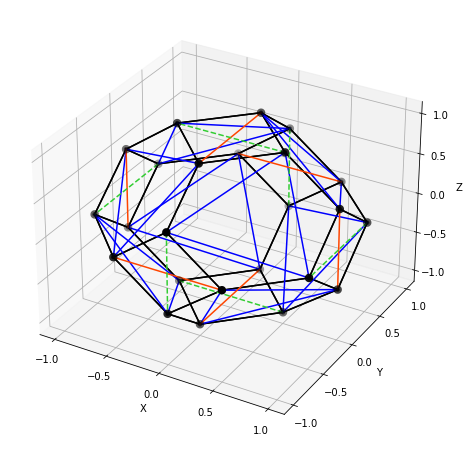

In [28]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', linewidth=4)
for edge in edges:
    p0 = vertices[edge[0]]
    p1 = vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='black')
    
for edge in edges_triangulation:
    p0 = edge[0]
    p1 = edge[1]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='blue')
    
for edge in square_diagonals:
    p0 = edge[0]
    p1 = edge[1]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='orangered')
        
for edge in square_angles:
    p0 = edge[0]
    p1 = edge[1]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='limegreen', linestyle='--')
    
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [29]:
simplices_hexagon_center = []
for triangle in triangles_hexogons:
    simplices_hexagon_center.append(np.concatenate([np.zeros([1, 3]), triangle], axis=0))
simplices_hexagon_center = np.array(simplices_hexagon_center)
simplices_hexagon_center.shape

(8, 4, 3)

In [30]:
simplices_hexagon_side = []
for p0, p1 in edges_triangulation:
    mid = 0.5*(p0 + p1)
    p2 = vertices[np.argmin(np.linalg.norm(vertices - mid, axis=1))]
    
    assert np.linalg.norm(p0-p2) == np.linalg.norm(p1-p2)
    simplices_hexagon_side.append([np.zeros(3), p0, p1, p2])
simplices_hexagon_side = np.array(simplices_hexagon_side)
simplices_hexagon_side.shape

(24, 4, 3)

In [31]:
simplices_square = []
for i in range(6):
    e0, e1 = square_diagonals[i]
    v0, v1 = square_angles[i]
    simplices_square.append([np.zeros(3), e0, e1, v0])
    simplices_square.append([np.zeros(3), e0, e1, v1])
simplices_square = np.array(simplices_square)
simplices_square.shape

(12, 4, 3)

/tmp/ipykernel_48932/1063472246.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


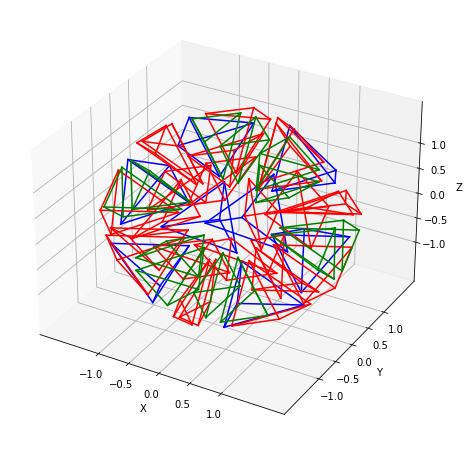

In [32]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

preeps = 0.75
for simplex in simplices_hexagon_center:
    eps = preeps*simplex.mean(axis=0)/np.linalg.norm(simplex.mean(axis=0))
    for i0, i1 in combinations(np.arange(4), 2):
        p0 = simplex[i0] + eps
        p1 = simplex[i1] + eps
        xs = [p0[0], p1[0]]
        ys = [p0[1], p1[1]]
        zs = [p0[2], p1[2]]
        ax.plot(xs, ys, zs, color='blue')
        
for simplex in simplices_hexagon_side:
    eps = preeps*simplex.mean(axis=0)/np.linalg.norm(simplex.mean(axis=0))
    for i0, i1 in combinations(np.arange(4), 2):
        p0 = simplex[i0] + eps
        p1 = simplex[i1] + eps
        xs = [p0[0], p1[0]]
        ys = [p0[1], p1[1]]
        zs = [p0[2], p1[2]]
        ax.plot(xs, ys, zs, color='red')
        
for simplex in simplices_square:
    eps = preeps*simplex.mean(axis=0)/np.linalg.norm(simplex.mean(axis=0))
    for i0, i1 in combinations(np.arange(4), 2):
        p0 = simplex[i0] + eps
        p1 = simplex[i1] + eps
        xs = [p0[0], p1[0]]
        ys = [p0[1], p1[1]]
        zs = [p0[2], p1[2]]
        ax.plot(xs, ys, zs, color='green')
        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [33]:
simplices = np.concatenate([simplices_hexagon_center, 
                            simplices_hexagon_side, 
                            simplices_square])
simplices.shape

(44, 4, 3)

In [34]:
filename = "package/simplicial-representations/TruncatedOctahedron-44.csv"
save(simplices, filename)
assert(load(filename) == simplices).all()

# 34

That complex contains 34 simpleces.

There is no additional points there.

But all opposite sides are equivalent by parallel move and you can reflect and roll that complex by third axis (Z).

I suggest, that's representation is the best one!

In [35]:
simplices = np.array([([-0.5,  0.0,  1.0], [ 0.5,  0.0,  1.0], [ 0.0, -0.5,  1.0], [-0.5, -1.0,  0.0]), 
                      ([ 0.5,  0.0,  1.0], [ 0.0, -0.5,  1.0], [-0.5, -1.0,  0.0], [ 0.5, -1.0,  0.0]), 
                      ([ 0.0, -0.5,  1.0], [-0.5, -1.0,  0.0], [ 0.5, -1.0,  0.0], [ 0.0, -1.0,  0.5]), 
                      ([-0.5,  0.0,  1.0], [ 0.5,  0.0,  1.0], [-0.5, -1.0,  0.0], [-1.0, -0.5,  0.0]), 
                      ([ 0.5,  0.0,  1.0], [-0.5, -1.0,  0.0], [-1.0, -0.5,  0.0], [ 0.5, -1.0,  0.0]), 
                      ([ 0.5,  0.0,  1.0], [-1.0, -0.5,  0.0], [ 0.5, -1.0,  0.0], [ 1.0, -0.5,  0.0])])
simplices = np.concatenate([simplices, simplices*np.array([1, -1, 1])])
simplices.shape

(12, 4, 3)

In [36]:
simplices_mid = np.array([([-0.5,  0.0,  1.0], [-1.0, -0.5,  0.0], [-1.0,  0.5,  0.0], [ 1.0, -0.5,  0.0]), 
                          ([-0.5,  0.0,  1.0], [ 1.0,  0.5,  0.0], [-1.0,  0.5,  0.0], [ 1.0, -0.5,  0.0]), 
                          ([-0.5,  0.0,  1.0], [ 0.5,  0.0,  1.0], [ 1.0, -0.5,  0.0], [ 1.0,  0.5,  0.0]), 
                          ([-1.0,  0.0,  0.5], [-0.5,  0.0,  1.0], [-1.0, -0.5,  0.0], [-1.0,  0.5,  0.0]), 
                          ([ 1.0,  0.0,  0.5], [ 0.5,  0.0,  1.0], [ 1.0, -0.5,  0.0], [ 1.0,  0.5,  0.0])])
simplices_mid *= np.array([-1, 1, 1])
simplices_mid.shape

(5, 4, 3)

In [37]:
simplices = np.concatenate([simplices, simplices_mid])
simplices = np.concatenate([simplices, simplices*np.array([1, 1, -1])])
simplices.shape

(34, 4, 3)

/tmp/ipykernel_48932/2870426551.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


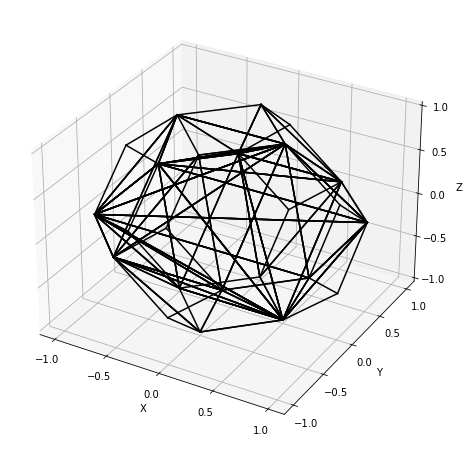

In [38]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

preeps = 0
for simplex in simplices:
    eps = preeps*simplex.mean(axis=0)#/np.linalg.norm(simplex.mean(axis=0))
    for i0, i1 in combinations(np.arange(len(simplex)), 2):
        p0 = simplex[i0] + eps
        p1 = simplex[i1] + eps
        xs = [p0[0], p1[0]]
        ys = [p0[1], p1[1]]
        zs = [p0[2], p1[2]]
        ax.plot(xs, ys, zs, color='black')
        
        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [39]:
filename = "package/simplicial-representations/TruncatedOctahedron-34.csv"
save(simplices, filename)
assert(load(filename) == simplices).all()